In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2025-04-16 18:59:59.818387: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
from keras.layers import TextVectorization

In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [16]:
train_texts = tf.constant(train_df["text"].values)

In [18]:
vectorizer = TextVectorization(
    max_tokens=1000,
    output_mode="int",
    output_sequence_length=50
)
vectorizer.adapt(train_texts)
vectorized_train_texts = vectorizer(train_texts)
print(vectorized_train_texts.numpy())

[[110   1  22 ...   0   0   0]
 [180  42 222 ...   0   0   0]
 [ 40   1   1 ...   0   0   0]
 ...
 [  1   1   1 ...   0   0   0]
 [ 76   1  38 ...   0   0   0]
 [  2 199  52 ...   0   0   0]]


In [28]:
y_train = np.array(train_df["target"]).astype(np.float32)
x_train = np.array(vectorized_train_texts).astype(np.float32)
print(y_train.shape)
print(x_train.shape)

(7613,)
(7613, 50)


In [66]:
optimizer=keras.optimizers.Adam(learning_rate=0.00075)
model = keras.Sequential([
    layers.Embedding(input_dim=1000, output_dim=32, input_length=50),
    layers.GlobalAveragePooling1D(),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5712 - loss: 0.6873 - val_accuracy: 0.5345 - val_loss: 0.6894
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5755 - loss: 0.6797 - val_accuracy: 0.5345 - val_loss: 0.6827
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5767 - loss: 0.6630 - val_accuracy: 0.6520 - val_loss: 0.6420
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6812 - loss: 0.6093 - val_accuracy: 0.7492 - val_loss: 0.5578
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7540 - loss: 0.5473 - val_accuracy: 0.7492 - val_loss: 0.5260
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7843 - loss: 0.4821 - val_accuracy: 0.7774 - val_loss: 0.4815
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7920 - loss: 0.4780 - val_accuracy: 0.7781 - val_loss: 0.4761
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8097 - loss: 0.4523 - val_accuracy: 0.

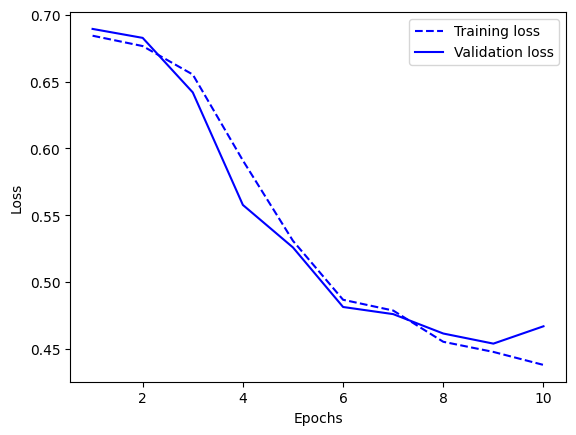

In [67]:
training_loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, 11)
plt.plot(epochs, training_loss, "b--", label="Training loss")
plt.plot(epochs, val_loss, "b-", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

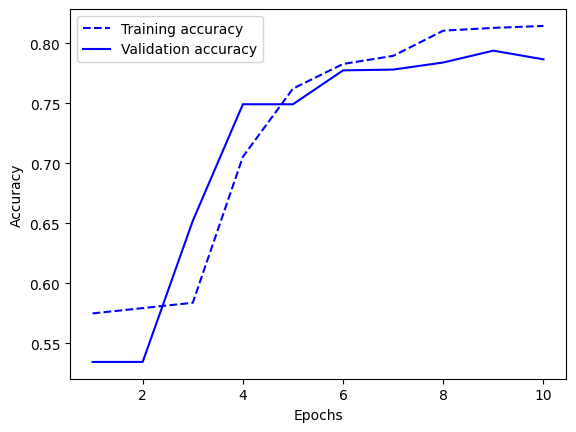

In [68]:
training_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, training_accuracy, "b--", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b-", label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [69]:
test_df = pd.read_csv("test.csv")

In [70]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [72]:
test_texts = tf.constant(test_df["text"].values)

In [73]:
vectorized_test_texts = vectorizer(test_texts)

In [74]:
x_test = np.array(vectorized_test_texts).astype(np.float32)

In [75]:
x_test.shape

(3263, 50)

In [77]:
predictions = model.predict(x_test)

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [78]:
predictions.shape

(3263, 1)

In [79]:
predictions.reshape((3263,))

array([0.44660848, 0.2913427 , 0.7798453 , ..., 0.863969  , 0.66619015,
       0.19028912], dtype=float32)

In [80]:
predictions = (predictions > 0.5).astype(int)

In [82]:
submission_df = pd.DataFrame({
    "id": test_df["id"],
    "target": predictions.flatten()
})
submission_df.to_csv("submission.csv", index=False)